In [1]:

import sys
sys.path.append('../src')

from module.module import Linear
from module.activation import TanH, Softmax

from loss.loss import CrossEntropie, CELogSoftmax
from networks.optim import Optim
from networks.sequentiel import Sequentiel

from utils.generation import generate_linear_data, generate_data_gauss
from utils.plots import plot_net, net_to_graph, classification_report
from utils.processing import one_hot_y

import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pkl.load(open("../data/usps.pkl",'rb')) 

In [4]:
X = data["X_train"]
y = data["Y_train"]

X = (X - X.min(axis=1, keepdims=True)) / (X.max(axis=1, keepdims=True) - X.min(axis=1, keepdims=True))

X_test = data["X_test"]

X_test = (X_test - X_test.min(axis=1, keepdims=True)) / (X_test.max(axis=1, keepdims=True) - X_test.min(axis=1, keepdims=True))

y_test = data["Y_test"]

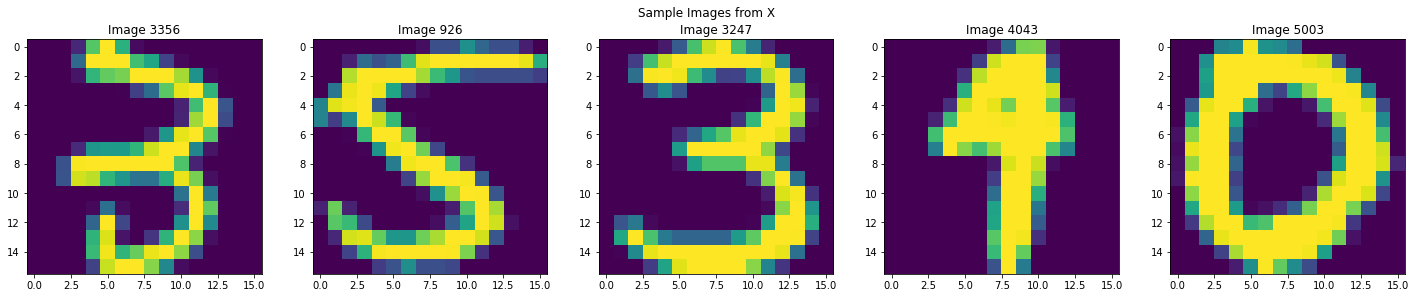

In [5]:
n = 5
fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(20, 4))

for ax in axes.flatten():
    i = np.random.randint(len(X))
    ax.imshow(X[i].reshape(16, 16))
    ax.set_title(f"Image {i+1}")

fig.suptitle("Sample Images from X")
plt.tight_layout()
plt.show()

In [6]:
classes = len(np.unique(y))

input_neurons = X.shape[1]
output_neurons = classes

In [7]:
y_one_hot = one_hot_y(y, classes)

100%|██████████| 50/50 [00:11<00:00,  4.27it/s]

Training completed.


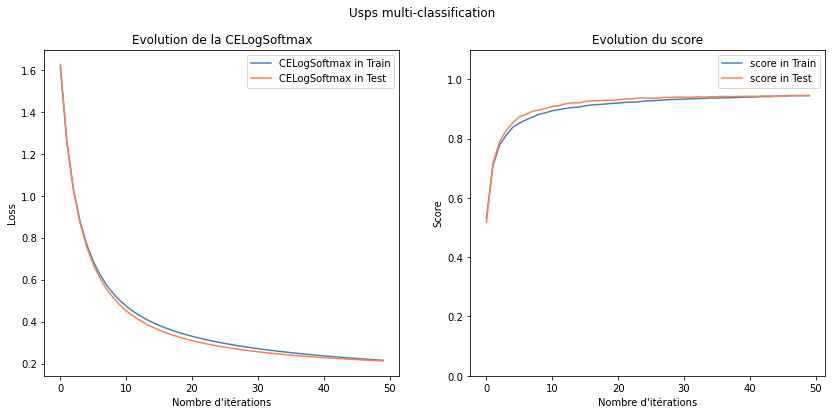

In [8]:
hidden_neurons_1 = 100
hidden_neurons_2 = 80

net = Sequentiel([
    Linear(input_neurons, hidden_neurons_1, bias=True, init="xavier"),
    TanH(),
    Linear(hidden_neurons_1, hidden_neurons_2, bias=True, init="xavier"),
    TanH(),
    Linear(hidden_neurons_2, output_neurons, bias=True, init="xavier"),
], classes_type="multi")

optim = Optim(net, CELogSoftmax(), eps=1e-4)
optim.SGD(X, y_one_hot, test_train_split=True, batch_size=10, epochs=50, verbose=False)

plot_net(optim, X, y_one_hot, net_type="multiclass", net_title="Usps multi-classification")

In [9]:
net_to_graph(net, horizontal=True, net_name='usps_multiclass')

In [10]:
net.score(X_test, y_test)

0.9292929292929293

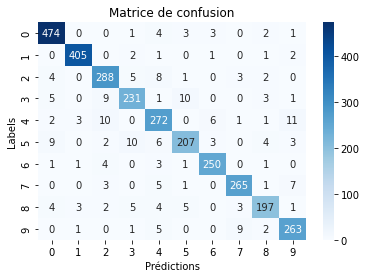

\begin{tabular}{lrllr}
\toprule
{} &  precision & recall & f1-score &  support \\
class    &            &        &          &          \\
\midrule
0        &       0.95 &   0.97 &     0.96 &      488 \\
1        &       0.98 &   0.98 &     0.98 &      412 \\
2        &       0.91 &   0.93 &     0.92 &      311 \\
3        &       0.91 &   0.89 &     0.90 &      260 \\
4        &       0.88 &   0.89 &     0.88 &      306 \\
5        &       0.91 &   0.85 &     0.88 &      244 \\
6        &       0.95 &   0.96 &     0.95 &      261 \\
7        &       0.94 &   0.94 &     0.94 &      282 \\
8        &       0.92 &   0.88 &     0.90 &      224 \\
9        &       0.91 &   0.94 &     0.92 &      281 \\
accuracy &       0.93 &        &          &     3069 \\
\bottomrule
\end{tabular}



In [11]:
yhat = net.predict(X_test)
yhat = yhat.reshape(-1)
df = classification_report(y_test, yhat, [f"{i}" for i in range(classes)])
print(df.to_latex(float_format="{:.2f}".format))

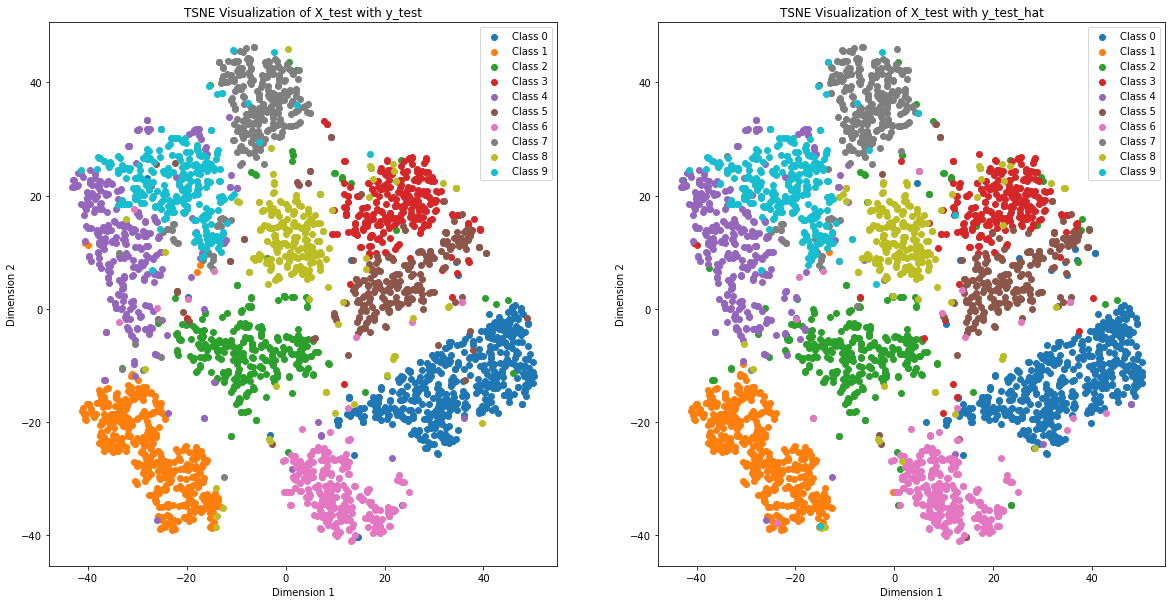

In [13]:
aff = TSNE(n_components=2, random_state=0, init="pca", n_iter=500, verbose=0)
sign_aff = aff.fit_transform(X_test)

colors = {i: plt.cm.tab10(i) for i in range(classes)}

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].set_title("TSNE Visualization of X_test with y_test")

for cl in range(classes):
    axs[0].scatter(sign_aff[y_test == cl][:, 0], sign_aff[y_test == cl][:, 1], color=colors[cl], label=f"Class {cl}")
    
axs[0].set_xlabel("Dimension 1")
axs[0].set_ylabel("Dimension 2")
axs[0].legend()

y_test_hat = net.predict(X_test).reshape(-1)

axs[1].set_title("TSNE Visualization of X_test with y_test_hat")
for cl in range(classes):
    axs[1].scatter(sign_aff[y_test_hat == cl][:, 0], sign_aff[y_test_hat == cl][:, 1], color=colors[cl], label=f"Class {cl}")
    
axs[1].set_xlabel("Dimension 1")
axs[1].set_ylabel("Dimension 2")
axs[1].legend()

plt.show()